# Sign Glove

Ploting the Data we get from the IMU sensor to visually see the difference between the signs

Import Libraries and connect to Google Drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for numerical computations

# generate accesss to the drive (=data)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code reads IMU data from CSV files, splits the data into separate columns for XAcc, YAcc, ZAcc, XGyro, YGyro, and ZGyro, converts the data to numeric format, and plots the data for each axis against time. Each plot represents one direction (x, y, or z) of IMU data.

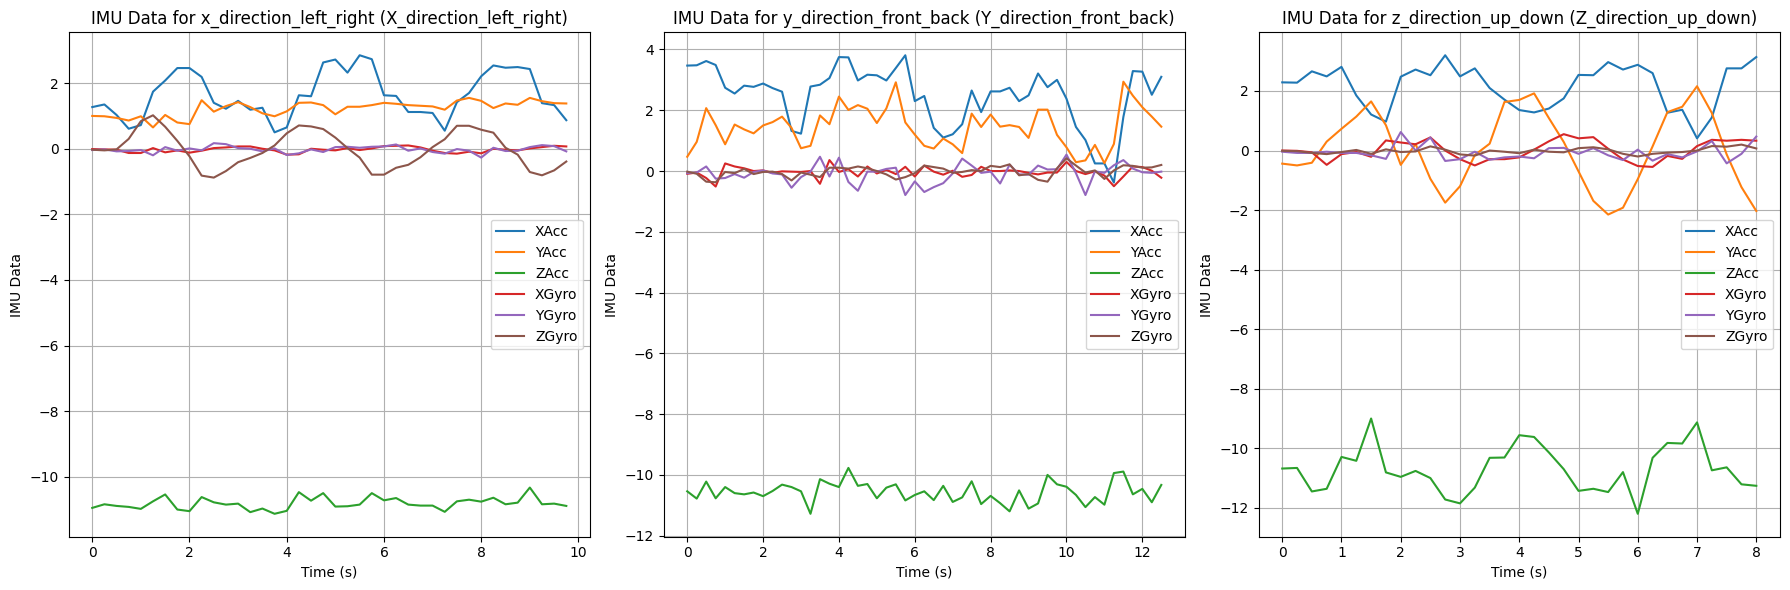

In [3]:
# Liste der Dateipfade
file_paths = ["/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/x_direction_left_right.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/y_direction_front_back.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/z_direction_up_down.csv",]

# Create a single figure with three subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, file_path in enumerate(file_paths):
    # Read the data
    df = pd.read_csv(file_path)

    # Split the single column into multiple columns
    df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']] = df['XAcc;YAcc;ZAcc;XGyro;YGyro;ZGyro'].str.split(';', expand=True)

    # Convert sensor values to numeric, handle errors with coerce
    df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']] = df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']].apply(pd.to_numeric, errors='coerce')

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Calculate the time vector based on the sampling rate (250 ms)
    sampling_rate = 0.25  # Sampling rate in seconds
    time_vector = np.arange(0, len(df) * sampling_rate, sampling_rate)

    # Plotting IMU data for each axis
    # Plotting acceleration data
    axes[i].plot(time_vector, df['XAcc'], label='XAcc')
    axes[i].plot(time_vector, df['YAcc'], label='YAcc')
    axes[i].plot(time_vector, df['ZAcc'], label='ZAcc')

    # Plotting gyroscope data
    axes[i].plot(time_vector, df['XGyro'], label='XGyro')
    axes[i].plot(time_vector, df['YGyro'], label='YGyro')
    axes[i].plot(time_vector, df['ZGyro'], label='ZGyro')

    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('IMU Data')
    axes[i].set_title(f'IMU Data for {file_path.split("/")[-1].split(".")[0]} ({file_path.split("/")[-1].split(".")[0].capitalize()})')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
